In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_ta as ta
from numpy.lib.stride_tricks import sliding_window_view
%matplotlib inline

In [2]:
data = yf.download(tickers="^RUI", start="2001-01-01", end="2023-06-01")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,700.090027,700.090027,673.130005,676.890015,676.890015,0
2001-01-03,676.940002,712.900024,670.890015,712.630005,712.630005,0
2001-01-04,712.590027,713.799988,701.340027,703.719971,703.719971,0
2001-01-05,703.719971,704.349976,682.020020,683.830017,683.830017,0
2001-01-08,683.830017,683.830017,670.760010,681.950012,681.950012,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5632 entries, 2001-01-02 to 2023-05-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5632 non-null   float64
 1   High       5632 non-null   float64
 2   Low        5632 non-null   float64
 3   Close      5632 non-null   float64
 4   Adj Close  5632 non-null   float64
 5   Volume     5632 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 308.0 KB


In [4]:
# Adding features
data["RSI"] = ta.rsi(data.Close, length = 15)
data["EMAF"] = ta.ema(data.Close, length=20)
data['EMAM'] = ta.ema(data.Close, length=100)
data['EMAS'] = ta.ema(data.Close, length=150)

# defing target value
data["Target"] = data["Adj Close"] - data.Open
data["Target"] = data["Target"].shift(-1)

# defing class
data["TargetClass"] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]  # I considering binary class to predict positive or negative

# define close target values
data['TargetNextClose'] = data['Adj Close'].shift(-1)

# Accroding to we has shifted data, result to Nan existing on the data frame. Drop it out.
data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(["Volume", "Close", "Date"], axis=1, inplace=True) # drop irrelevant features


In [5]:
data.head()

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,639.859985,639.859985,631.090027,632.489990,46.207557,636.255431,649.695142,656.879265,1.790039,1,634.280029
1,632.489990,635.900024,629.869995,634.280029,47.490715,636.067298,649.389892,656.579937,-10.990051,0,623.289978
2,634.280029,635.440002,622.090027,623.289978,41.049509,634.850410,648.873062,656.139010,-0.380005,0,622.909973
3,623.289978,623.530029,618.190002,622.909973,40.844279,633.713226,648.358942,655.698891,3.460022,1,626.369995
4,622.909973,628.000000,615.880005,626.369995,43.595352,633.013870,647.923517,655.310429,1.229980,1,627.599976


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5482 entries, 0 to 5481
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             5482 non-null   float64
 1   High             5482 non-null   float64
 2   Low              5482 non-null   float64
 3   Adj Close        5482 non-null   float64
 4   RSI              5482 non-null   float64
 5   EMAF             5482 non-null   float64
 6   EMAM             5482 non-null   float64
 7   EMAS             5482 non-null   float64
 8   Target           5482 non-null   float64
 9   TargetClass      5482 non-null   int64  
 10  TargetNextClose  5482 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 471.2 KB


In [7]:
data.describe()

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
count,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000
mean,1074.617855,1081.191768,1067.649028,1074.875197,53.985674,1072.053877,1060.675238,1053.694771,0.259060,0.539584,1075.177530
std,572.515018,576.010838,568.956776,572.741734,10.857617,570.153835,560.238651,553.693548,13.085500,0.498476,572.945576
min,367.529999,377.709991,362.250000,367.549988,14.082916,403.564382,461.090978,469.723011,-173.589966,0.000000,367.549988
25%,636.742523,640.649994,631.452484,636.715012,46.183950,637.463245,629.092823,626.648805,-3.977493,0.000000,636.954987
50%,804.214996,809.475006,800.269989,804.934998,55.148810,801.383301,798.486564,790.221891,0.589981,1.000000,805.014984
75%,1423.969971,1431.344971,1416.520050,1425.062469,62.192662,1426.232428,1405.375619,1384.282277,4.997498,1.000000,1426.932526
max,2660.989990,2672.000000,2653.479980,2660.780029,84.886393,2622.393675,2555.318207,2509.496263,105.410034,1.000000,2660.780029


# Preprocessing

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [9]:
data

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,639.859985,639.859985,631.090027,632.489990,46.207557,636.255431,649.695142,656.879265,1.790039,1,634.280029
1,632.489990,635.900024,629.869995,634.280029,47.490715,636.067298,649.389892,656.579937,-10.990051,0,623.289978
2,634.280029,635.440002,622.090027,623.289978,41.049509,634.850410,648.873062,656.139010,-0.380005,0,622.909973
3,623.289978,623.530029,618.190002,622.909973,40.844279,633.713226,648.358942,655.698891,3.460022,1,626.369995
4,622.909973,628.000000,615.880005,626.369995,43.595352,633.013870,647.923517,655.310429,1.229980,1,627.599976
...,...,...,...,...,...,...,...,...,...,...,...
5477,2260.239990,2261.129883,2246.750000,2246.770020,49.783468,2252.235729,2217.084544,2211.706797,20.969971,1,2274.540039
5478,2253.570068,2277.659912,2249.179932,2274.540039,56.168374,2254.359949,2218.222276,2212.539025,21.899902,1,2296.639893
5479,2274.739990,2298.800049,2272.280029,2296.639893,60.455536,2258.386611,2219.775100,2213.652944,-8.429932,0,2292.000000
5480,2300.429932,2303.810059,2286.209961,2292.000000,59.154024,2261.587886,2221.205296,2214.690654,2.810059,1,2294.280029


In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Target','TargetClass','TargetNextClose'],axis=1),data[["TargetNextClose"]] , test_size=0.2, random_state=42, shuffle=False)
# scalize data
scaler = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# scale targer
scaler_target = MinMaxScaler()
y_train_scaled = scaler_target.fit_transform(y_train)
y_test_scaled = scaler_target.transform(y_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(4385, 8)
(1097, 8)
(4385, 1)
(1097, 1)


In [11]:
def rolling_window(array, window_size):
    num_features = array.shape[-1]
    return sliding_window_view(array,(window_size,num_features)).reshape((-1,window_size,num_features))

In [12]:
# create multiple time stamp to bo inputs
# sliding data with specifics time windows.
window_size = 30
# considering TRAIN dataset
X_train_sliced = rolling_window(X_train_scaled, window_size)
X_test_sliced  = rolling_window(X_test_scaled, window_size)
# considering y
y_train_sliced = y_train_scaled[window_size-1:]
y_test_sliced = y_test_scaled[window_size-1:]
print(X_train_sliced.shape)
print(y_train_sliced.shape)
print(X_test_sliced.shape)
print(y_test_sliced.shape)

(4356, 30, 8)
(4356, 1)
(1068, 30, 8)
(1068, 1)


# Train LSTM session

In [13]:
from tensorflow.keras.models import Model
from keras.layers import LSTM, Dense, Input, Activation, Flatten
from tensorflow.keras.layers import Dropout
import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint

# LSTM architecture
def Models(window_size, n_features, n_lstm_layer, drop_out=0.4):
    lstm_imput = Input(shape=(window_size, n_features), name = "lstm_input")
    if n_lstm_layer == 1:
        drop_layer = LSTM(150, name=f"lstm_layer_1")(lstm_imput)
    else:
        for i in range(n_lstm_layer):
            if i == 0:
                lstm_layer = LSTM(150, name=f"lstm_layer_{i}", return_sequences=True)(lstm_imput)
                drop_layer = Dropout(drop_out)(lstm_layer)
            elif i == n_lstm_layer-1:
                lstm_layer = LSTM(50*(n_lstm_layer-i), name=f"lstm_layer_end")(drop_layer)
                drop_layer = Dropout(drop_out)(lstm_layer)
            else:
                lstm_layer = LSTM(50*(n_lstm_layer-i), name=f"lstm_layer_{i}", return_sequences=True)(drop_layer)
                drop_layer = Dropout(drop_out)(lstm_layer)
    flatten_layer = Flatten(name='flatten')(drop_layer)
    dense_layer = Dense(100,name="dease_layer")(flatten_layer)
    activation_layer = Activation("relu")(dense_layer)
    dense_layer1 = Dense(50,name="dease_layer2")(activation_layer)
    activation_layer1 = Activation("relu")(dense_layer1)
    drop_layer = Dropout(drop_out)(activation_layer1)
    dense_layer2 = Dense(1,name="dease_layer3")(drop_layer)
    output = Activation("linear", name="output")(dense_layer2)
        
    return Model(lstm_imput, output)
    
#create model
checkpoint = ModelCheckpoint(filepath="./best_weigth.h5",
                                     verbose=1,
                                     save_best_only=True,
                                     save_weights_only=True,
                                     )
model = Models(window_size,8,1)
adam = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer="adam", loss="mse", metrics=["mse"])
model.summary()



2023-05-23 21:55:43.607363: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 30, 8)]           0         
                                                                 
 lstm_layer_1 (LSTM)         (None, 150)               95400     
                                                                 
 flatten (Flatten)           (None, 150)               0         
                                                                 
 dease_layer (Dense)         (None, 100)               15100     
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dease_layer2 (Dense)        (None, 50)                5050      
                                                                 
 activation_1 (Activation)   (None, 50)                0     

2023-05-23 21:55:46.553355: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-23 21:55:46.554295: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-23 21:55:46.555721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [14]:
history = model.fit(x=X_train_sliced, y=y_train_sliced, batch_size=32, epochs=50, shuffle=True, 
                    # validation_split=0.2, 
                    validation_data = (X_test_sliced,y_test_sliced),
                    callbacks = [checkpoint])

Epoch 1/50


2023-05-23 21:55:46.987706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-23 21:55:46.989636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-23 21:55:46.991469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

133/137 [============================>.] - ETA: 0s - loss: 0.0114 - mse: 0.0114

2023-05-23 21:55:50.811663: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-23 21:55:50.813822: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-23 21:55:50.815245: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus


Epoch 1: val_loss improved from inf to 0.01134, saving model to ./best_weigth.h5
137/137 [==============================] - 4s 17ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2/50
135/137 [============================>.] - ETA: 0s - loss: 0.0061 - mse: 0.0061
Epoch 2: val_loss did not improve from 0.01134
137/137 [==============================] - 2s 14ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 3/50
135/137 [============================>.] - ETA: 0s - loss: 0.0053 - mse: 0.0053
Epoch 3: val_loss did not improve from 0.01134
137/137 [==============================] - 2s 15ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0559 - val_mse: 0.0559
Epoch 4/50
133/137 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 4: val_loss did not improve from 0.01134
137/137 [==============================] - 2s 15ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 5/50
133/1

In [15]:
model.load_weights('./best_weigth.h5')

34/34 [==============================] - 0s 5ms/step


Text(0.5, 1.0, 'Test dataset')

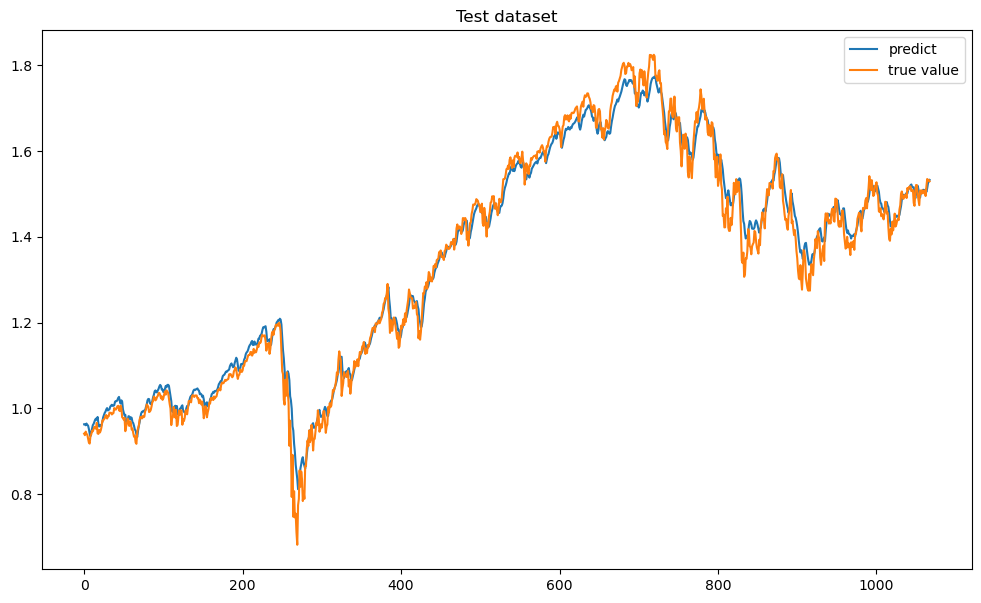

In [21]:

predict = model.predict(X_test_sliced)
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(predict, label="predict")
ax.plot(y_test_sliced, label="true value")
ax.legend()
plt.title('Test dataset')

137/137 [==============================] - 1s 7ms/step


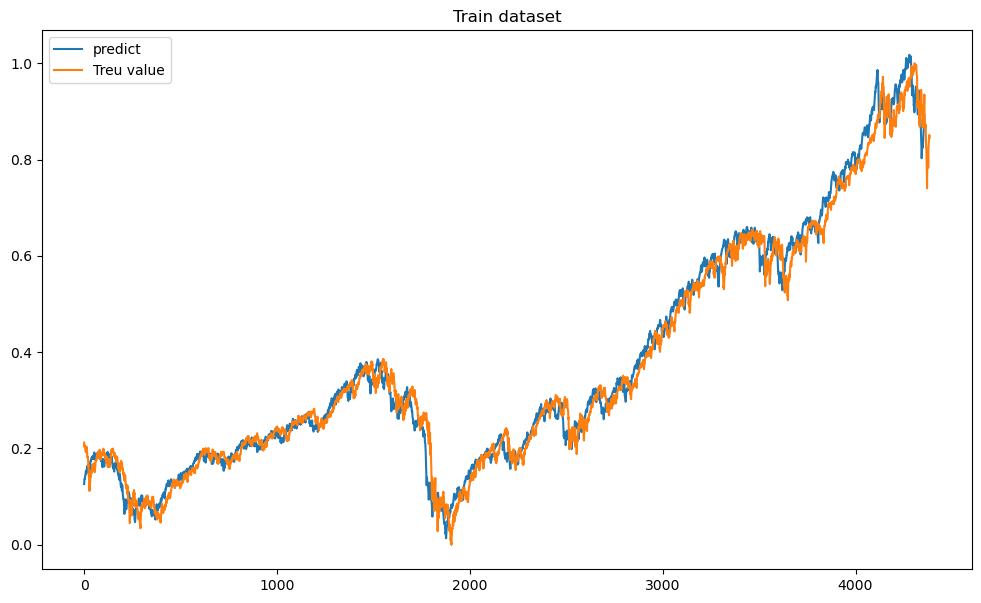

In [25]:
predict = model.predict(X_train_sliced)
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(predict, label='predict')
ax.plot(y_train_scaled, label='Treu value')
plt.title('Train dataset')
ax.legend()

Text(0.5, 0, 'Epochs')

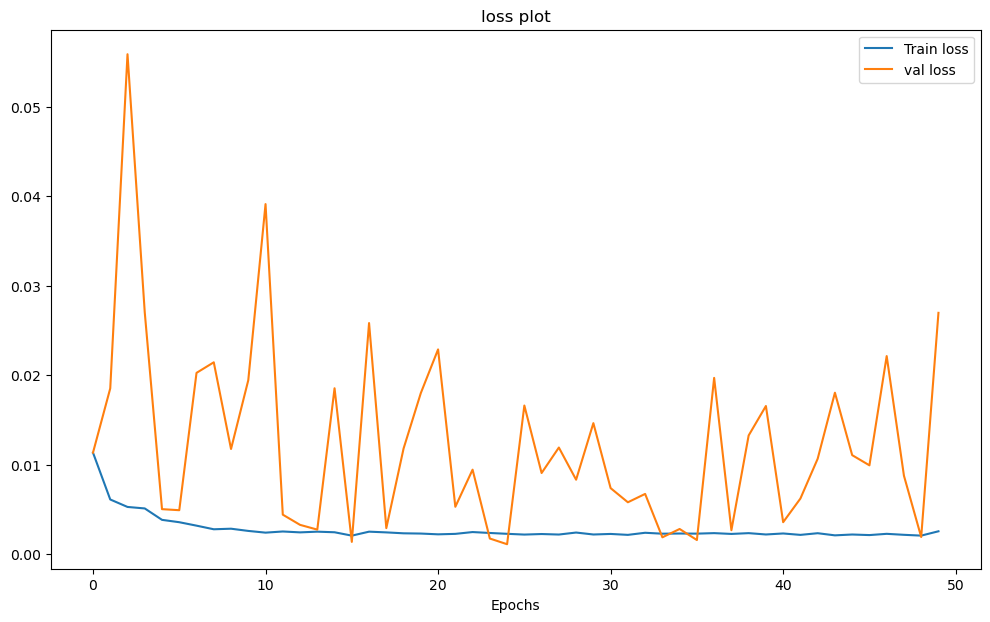

In [18]:
fig, ax = plt.subplots(figsize=(12,7))
plt.title("loss plot")
ax.plot(history.history['loss'], label="Train loss")
ax.plot(history.history['val_loss'], label="val loss")
ax.legend()
plt.xlabel("Epochs")

In [19]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

Text(0.5, 0, 'Epochs')

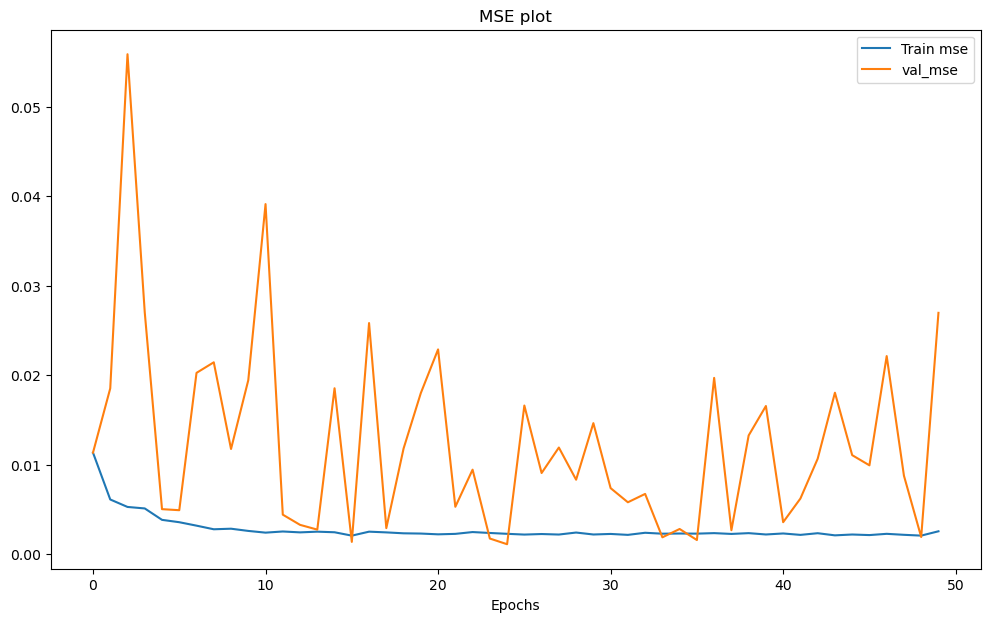

In [20]:
fig, ax = plt.subplots(figsize=(12,7))
plt.title("MSE plot")
ax.plot(history.history['mse'], label="Train mse")
ax.plot(history.history['val_mse'], label="val_mse")
ax.legend()
plt.xlabel("Epochs")